## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
num_col = df.shape[0]
num_col

294478

c. The number of unique users in the dataset.

In [4]:
num_user_unique=df.user_id.unique().shape[0]
num_user_unique

290584

d. The proportion of users converted.

In [5]:
num_user_conv = df.converted.sum()
prop_conv = num_user_conv/num_col
prop_conv

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
rows_nomatch = ((df.group=='control')==(df.landing_page=='new_page'))
rows_nomatch.sum()


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df[rows_nomatch==False]
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
rows_repeat = df2[df2.user_id.duplicated(keep=False)]
rows_repeat.user_id.iloc[0]

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
rows_repeat

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
a=df2.drop(1899)
a.reindex()
df2=a.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.sum()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control = df2[df2['group']=='control']
control.converted.sum()/control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment = df2[df2['group']=='treatment']
treatment.converted.sum()/treatment.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
(df2.landing_page=='new_page').sum()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

>***The mean conversion value for control group is 0.1204, while for treatment group is 0.1188. Although there seems a little difference between the two groups, and the treatment group has even slightly lower conversion rate than the control group, there is not sufficient evidence to make any conclusions, either treatment group leads to more conversions or the control group.***


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>***The null hypotheses is $p_{old} \geq p_{new}$. The alternative hypotheses is $p_{old} < p_{new}$.***

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.sum()/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.sum()/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = treatment.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old=control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
def ran(p):
    return '1' if random.random()<p else '0'
def p_sim(p,n):
    page_converted = [ran(p) for i in range(n)]
    p=page_converted.count('1')/n
    return p

In [23]:
p_new_sim = p_sim(p_new,n_new)
p_new_sim

0.12018443328057257

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
p_old_sim=p_sim(p_old,n_old)
p_old_sim

0.12013849690928866

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new_sim-p_old_sim

4.59363712839167e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

**binomial** function was used here to simulate 10000 times processes under *p_new/p_old* probabilities for *n_new/n_old* numbers of sampling with replacement. This method was way faster than using **for** loop.

In [26]:
p_diffs = []
p_new_sim = np.random.binomial(n_new,p_new,10000)/n_new
p_old_sim = np.random.binomial(n_old,p_old,10000)/n_old
p_diffs = p_new_sim - p_old_sim 
p_diffs

array([ -8.14286661e-04,   1.45674232e-03,  -8.20917810e-04, ...,
        -1.56966220e-05,  -1.55075938e-03,   7.75586940e-04])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

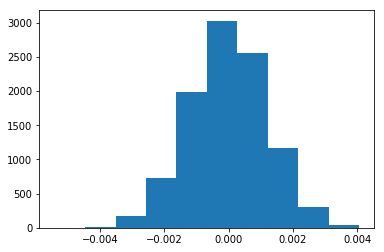

In [27]:
plt.hist(p_diffs)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_diff = treatment.converted.sum()/treatment.shape[0]-control.converted.sum()/control.shape[0]
(p_diffs>p_diff).mean()

0.90380000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>***This value is the p-value. This value means if the null hypotheses, which is the conversion ratio for old pages is larger than new pages, got rejected, how much the type-1 error is.***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = control.converted.sum()
convert_new = treatment.converted.sum()
n_old = control.shape[0]
n_new = treatment.shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
sm.stats.proportions_ztest(np.array([convert_old,convert_new]),np.array([n_old,n_new]),0,alternative='smaller')

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>***The z-score is 1.31 and the p-value is 0.905. The p-value using the built-in library agrees with the findings in j.***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>***Logistic Regression.***

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

First, the **intercept** column should be set as 1 for all the rows, and use *get_dummies* to convert the **landing_page** column to a boolean column **ab_page**. The *get_dummies* function could convert the column into two columns, one called **ab_page**, and the other called **ba_page**.

In [31]:
df2['intercept']=1
df2[['ab_page','ba_page']]=pd.get_dummies(df['landing_page'])

However, since we only need one column and want to set 1 for treatment group or new_page, we just need **ab_page** column, so I dropped **ba_page** column.

In [32]:
df2=df2.drop('ba_page',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

I used **statsmodels** to instanstiate the logistic regression model using **ab_page** to predict the **converted**. 

In [33]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

>***The p-value here in the regression model is 0.19. In the regression model, the null hypotheses is that there is no correlation between the variable "ab_page" to the label "converted", which is different from the null hypotheses in previous part, which is $p_{old}\geq p_{new}$. The althernative hypotheses in regression model is $p_{old}> p_{new}$, and it is opposite to the null hypotheses in part II, which is $p_{old}< p_{new}$. Therefore the p-value is actually calculated using the other side of the histogram. In other words, the regression model performed in this part used a two-tailed test, while the previous part used a one-tailed test.***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>***Other factors like individual's demographic data,such as gender, age, income etc, might also influence the conversion ratio. Adding more factors might include different perspectives that only the new page cannot explain. However, by adding additional factors may also complicate the model.***

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

***My answer:***
>***All of the p-values for three contries, CA,UK and US, are larger than 0.05, meaning that none of the contries have a significant correlation with the conversion ratio.***

In [35]:
df_countries = pd.read_csv('countries.csv')
df3 = df2.set_index('user_id')
df4 = df3.join(df_countries.set_index('user_id'),on='user_id')

In [36]:
df5 = df4.join(pd.get_dummies(df4.country), on='user_id')
df5.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [37]:
logit_mod_ca = sm.Logit(df5['converted'],df5[['intercept','CA']]).fit()
logit_mod_ca.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212779.3889
No. Observations:   290584           BIC:              212800.5482
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9941    0.0059  -340.2716  0.0000  -2.0056  -1.9826
CA           -0.0434    0.0267    -1.6288  0.1034  -0.0957   0.0088
==================================================================

"""

In [38]:
logit_mod_uk = sm.Logit(df5['converted'],df5[['intercept','UK']]).fit()
logit_mod_uk.summary2()

Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212781.1581
No. Observations:   290584           BIC:              212802.3174
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9994    0.0066  -302.6399  0.0000  -2.0124  -1.9865
UK            0.0126    0.0132     0.9550  0.3396  -0.0132   0.0384
==================================================================

"""

In [39]:
logit_mod_us = sm.Logit(df5['converted'],df5[['intercept','US']]).fit()
logit_mod_us.summary2()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212782.0524
No. Observations:   290584           BIC:              212803.2117
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9951    0.0104  -190.9985  0.0000  -2.0156  -1.9747
US           -0.0016    0.0125    -0.1278  0.8983  -0.0261   0.0229
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

***My answer:***
>***I multiplied the factor "ab_page" with all of the countries and obtained new columns "CA_new", "UK_new" and "US_new". And then looked at if any of the new columns correlates with the conversion ratio. It turns out that the factor "CA_new" has a p-value of 0.04 and z-value of -2.052. The null hypotheses in default for the results shown below is $p_{CA\_new}=p_{no\_CA\_new}$ and the result for the coefficient in the logistic regression is -0.0771, which represents that the conversion ratio for "CA_new"=0 group is significantly higher than "CA_new"=1 group.***

>***In terms of the "CA_new" factor, 0 represents cases when either "ab_page" or "CA is 0, and 1 represents cases when both "ab_page" and "CA" is 1. In other words, CA_new=0 means either the users landed in old page, aka in the control group, or the users are not from CA, while CA_new=1 means the users landed in new page (the treatment group) and are from CA.*** 

In [40]:
df5['CA_new']=df5['ab_page']*df5['CA']
df5['UK_new']=df5['ab_page']*df5['UK']
df5['US_new']=df5['ab_page']*df5['US']
df5.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_new,UK_new,US_new
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [41]:
logit_mod_ca_new = sm.Logit(df5['converted'],df5[['intercept','CA_new']]).fit()
logit_mod_ca_new.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212777.7789
No. Observations:   290584           BIC:              212798.9382
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9944    0.0058  -344.6892  0.0000  -2.0057  -1.9830
CA_new       -0.0771    0.0376    -2.0516  0.0402  -0.1507  -0.0034
==================================================================

"""

In [42]:
logit_mod_uk_new = sm.Logit(df5['converted'],df5[['intercept','UK_new']]).fit()
logit_mod_uk_new.summary2()

Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212781.1019
No. Observations:   290584           BIC:              212802.2612
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9984    0.0061  -326.8527  0.0000  -2.0104  -1.9864
UK_new        0.0170    0.0172     0.9849  0.3247  -0.0168   0.0508
==================================================================

"""

In [43]:
logit_mod_us_new = sm.Logit(df5['converted'],df5[['intercept','US_new']]).fit()
logit_mod_us_new.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:14 AIC:              212780.1581
No. Observations:   290584           BIC:              212801.3174
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9905    0.0071  -281.1736  0.0000  -2.0043  -1.9766
US_new       -0.0166    0.0120    -1.3814  0.1672  -0.0401   0.0069
==================================================================

"""

<a id='conclusions'></a>
## Conclusions

> In conclusion, after two different methods used in part I and part II, the treatment group of landing on the new pages does not significantly relate to the conversion. After adding up the countries' factor to each user in part III, the country alone is also not a significant factor for the conversion. However, if we combine the treatment group information and the country information, I found that a user who is in the treatment group and from Canada, converts significantly less than others.



This is for submission.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0